Premières lignes du DataFrame:
   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB
None

Valeurs manquantes dans le DataFrame:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Statistiques descriptives:
              userId        movieId     timestamp
count  465564.000000  465564.000000  4.655640e+05
mean    687

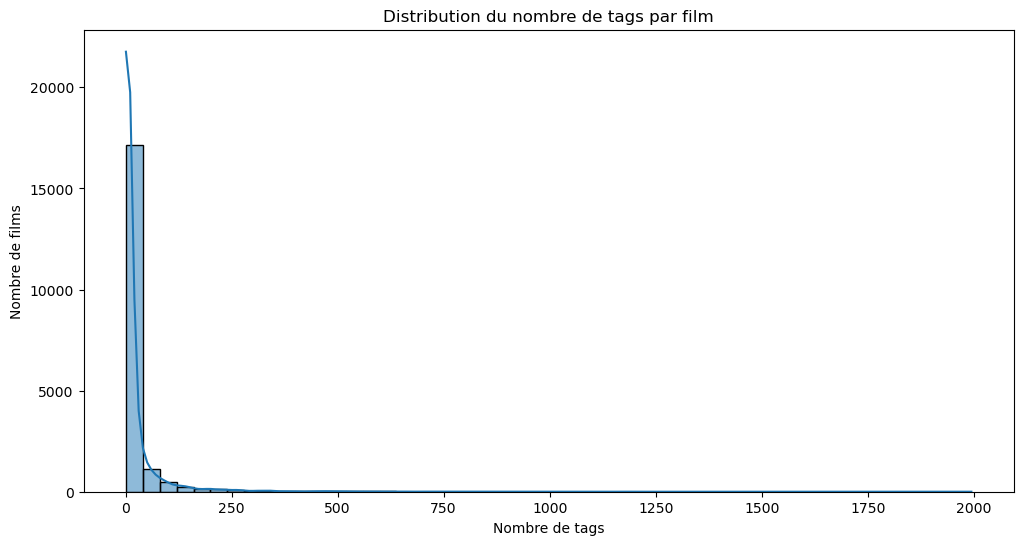

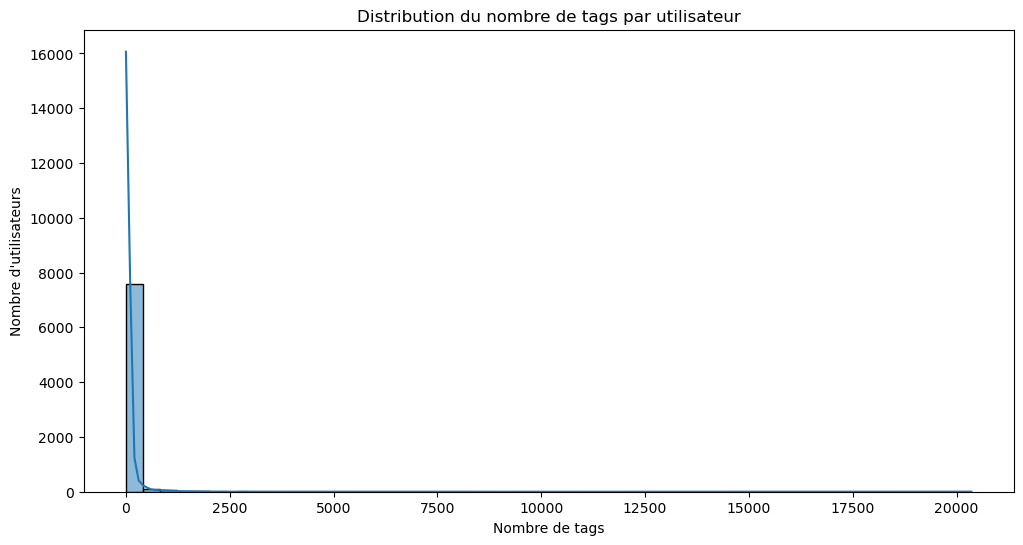

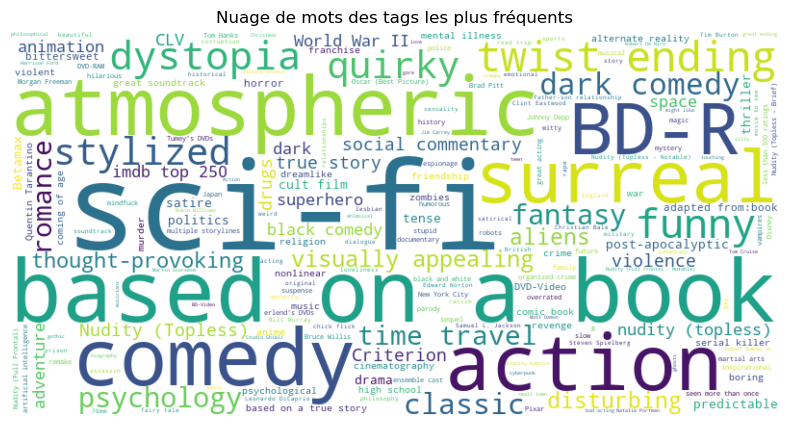

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
tags_df = pd.read_csv('/Film_recom/Datasets/tags.csv')

# Afficher les premières lignes du DataFrame
print("Premières lignes du DataFrame:")
print(tags_df.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
print(tags_df.info())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le DataFrame:")
print(tags_df.isnull().sum())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives:")
print(tags_df.describe())

# Afficher les 10 tags les plus fréquents
print("\nLes 10 tags les plus fréquents:")
print(tags_df['tag'].value_counts().head(10))

# Nombre de tags uniques
print(f"\nNombre de tags uniques: {tags_df['tag'].nunique()}")

# Nombre de films uniques
print(f"\nNombre de films uniques: {tags_df['movieId'].nunique()}")

# Nombre d'utilisateurs uniques
print(f"\nNombre d'utilisateurs uniques: {tags_df['userId'].nunique()}")

# Distribution du nombre de tags par film
tags_per_movie = tags_df.groupby('movieId')['tag'].count()
plt.figure(figsize=(12, 6))
sns.histplot(tags_per_movie, bins=50, kde=True)
plt.title('Distribution du nombre de tags par film')
plt.xlabel('Nombre de tags')
plt.ylabel('Nombre de films')
plt.show()

# Distribution du nombre de tags par utilisateur
tags_per_user = tags_df.groupby('userId')['tag'].count()
plt.figure(figsize=(12, 6))
sns.histplot(tags_per_user, bins=50, kde=True)
plt.title('Distribution du nombre de tags par utilisateur')
plt.xlabel('Nombre de tags')
plt.ylabel('Nombre d\'utilisateurs')
plt.show()

# Nuage de mots des tags les plus fréquents
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tags_df['tag'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags les plus fréquents')
plt.show()

In [ ]:
from tags_pipeline import TagDataPipeline

# Créer une instance du pipeline
pipeline = TagDataPipeline('/Film_recom/Datasets/tags.csv')

# Exécuter le pipeline
pipeline.run_pipeline()

# Si vous voulez accéder aux données traitées
processed_data = pipeline.get_data()

# Vous pouvez maintenant utiliser processed_data pour d'autres analyses si nécessaire